In [1]:
import scipy.stats as st
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
np.random.seed(0)

In [3]:
N = 100
coin_tosses = st.binom.rvs(1, 0.5, size=N)

In [4]:
coin_tosses

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

We toss a fair coin $N=100$ times, each toss $X$ follows a Bernoulli distribution  $X \sim Bernoulli(\theta)$, with $\theta=0.5$. The goal is to estimate the parameter $\theta$ based on the observed values.

We have 3 Bayesian agents. Each of them has her/his own prior belief.

$Beta(\alpha, \beta)$ prior mimics a binomial likelihood with $y_0=\alpha-1$ successes in $n_0=\alpha+\beta-2$ trials.

Agent 1 (vague, uniform):

$p(\theta) \sim Beta(1,1)$

Agent 2 (opinionated with mean 0.5):

$p(\theta) \sim Beta(11,11)$

Agent 3 (biased with mean 0.17):

$p(\theta) \sim Beta(2,20)$

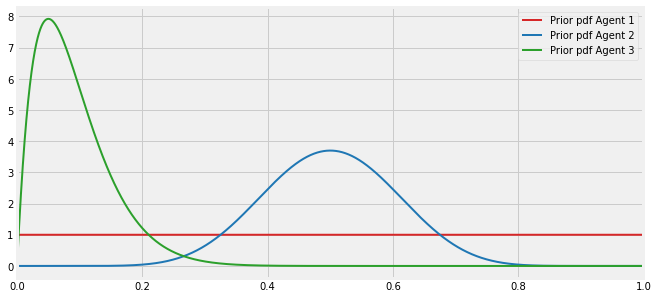

In [5]:
a_1  = 1
b_1 = 1
a_2 = 11
b_2 = 11
a_3 = 2
b_3 = 20
i = 0
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
colors = ["tab:red", "tab:blue", "tab:green"]
for a, b in zip([a_1, a_2, a_3], [b_1, b_2, b_3]):
    x = np.linspace(0, 2, 100000)
    ax.plot(x, st.beta.pdf(x, a, b), colors[i], lw=2, label=f"Prior pdf Agent {i+1}")
    ax.legend(loc="upper right")
    ax.set_xlim(left=0, right=1)
    i+=1
plt.show()

## Plot posterior mean as a function of new data

In [6]:
m = {}
i = 0
for a, b in zip([a_1, a_2, a_3], [b_1, b_2, b_3]):
    m[i] = [a/(a+b)]
    for k in coin_tosses:
        a = a + k
        b = b + 1 - k
        m[i].append(a/(a+b))
    i += 1

In [7]:
m_mle = [0.5] + list(np.cumsum(coin_tosses) / np.linspace(1, N, N))

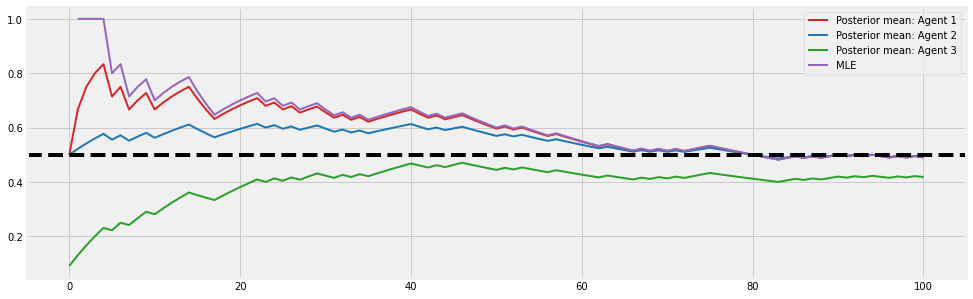

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
x = np.linspace(0, N, N+1)
ax.plot(x, m[0], "tab:red", lw=2, label="Posterior mean: Agent 1")
ax.plot(x, m[1], "tab:blue", lw=2, label="Posterior mean: Agent 2")
ax.plot(x, m[2], "tab:green", lw=2, label="Posterior mean: Agent 3")
ax.plot(x[1:], m_mle[1:], "tab:purple", lw=2, label="MLE")
ax.legend(loc="best")
ax.axhline(0.5, c="black", linestyle='--')
plt.show()

## Posterior after all tosses

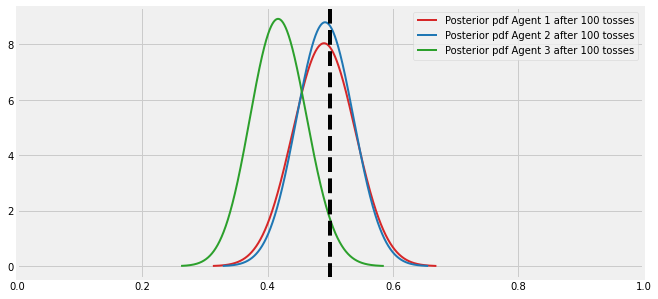

In [9]:
a_1  = 1 + np.sum(coin_tosses)
b_1 = 1 - np.sum(coin_tosses) + N
a_2 = 11 + np.sum(coin_tosses)
b_2 = 11 - np.sum(coin_tosses) + N
a_3 = 2 + np.sum(coin_tosses)
b_3 = 20 - np.sum(coin_tosses) + N
i = 0
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
colors = ["tab:red", "tab:blue", "tab:green"]
for a, b in zip([a_1, a_2, a_3], [b_1, b_2, b_3]):
    x = np.linspace(st.beta.ppf(0.0001, a, b), st.beta.ppf(0.9999, a, b), 100000)
    ax.plot(x, st.beta.pdf(x, a, b), colors[i], lw=2, label=f"Posterior pdf Agent {i+1} after {N} tosses")
    ax.legend(loc="upper right")
    ax.set_xlim(left=0, right=1)
    i+=1
    
ax.axvline(0.5, c="black", linestyle='--')
plt.show()

## Hypothesis testing
In Bayesian statistics the posterior gives us the full description of the parameter in question which makes the hypothesis testing trivial.

Suppose we toss a coin 12 times and we record 9 heads and 3 tails. Let $\theta$ be the probability of heads.

For prior $Beta(1,1)$ the posterior is $Beta(10, 4)$

$H_0: \theta=0.5$, $H_1: \theta>0.5$:

In [10]:
x = 0.5
p = 1 - st.beta.cdf(x, 10, 4)
print(f"P(theta>0.5): {p}")
print(f"P(theta<0.5): {1-p}")

P(theta>0.5): 0.953857421875
P(theta<0.5): 0.046142578125


### Frequentist hypothesis testing
a) Toss the coin N times and record the number of heads and tails

b) Toss the coins until Kth tail is recorded. Count the number of heads before Kth tail is recorded

In [11]:
print(f"For experimental set up a) the p-value is: {np.sum([st.binom.pmf(k, 12, x) for k in range(9, 12+1)])}")

For experimental set up a) the p-value is: 0.07299804687499994


In [12]:
print(f"For experimental set up b) the p-value is: {np.sum([sp.comb(2+k, k) * x**k * (1-x)**3 for k in range(9, 10**2)])}")

For experimental set up b) the p-value is: 0.03271484375
